Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import ydata_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.model_selection import learning_curve

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'keras.wrappers'

In [7]:
data = pd.read_csv(r"C:\Users\okechukwu chude\Documents\MOdeling and optimisation\Heart disease prediction\heart_disease_uci.csv")

In [8]:
data.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
#checking for missing values
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [11]:
#renaming num column to target
data['target'] = data['num']
#removing irrelevant columns and columns with high missing values
data = data.drop(columns=['id', 'dataset', 'ca', 'thal', 'num'])

In [12]:
data = data[data['target'].isin([0, 1])]
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,1
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,0
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,0


In [14]:
#dropping rows with null values
data = data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       368 non-null    int64  
 1   sex       368 non-null    object 
 2   cp        368 non-null    object 
 3   trestbps  368 non-null    float64
 4   chol      368 non-null    float64
 5   fbs       368 non-null    object 
 6   restecg   368 non-null    object 
 7   thalch    368 non-null    float64
 8   exang     368 non-null    object 
 9   oldpeak   368 non-null    float64
 10  slope     368 non-null    object 
 11  target    368 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 34.6+ KB


Data Visualisation

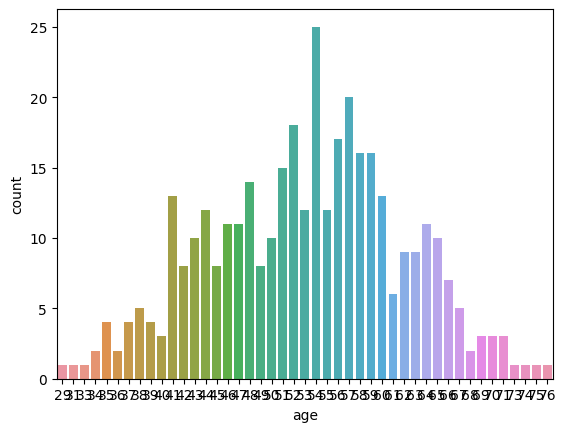

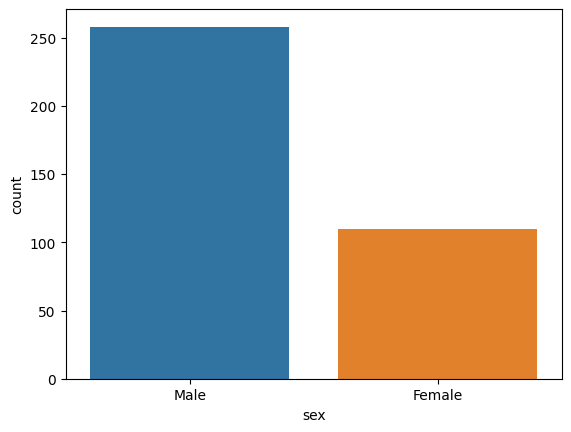

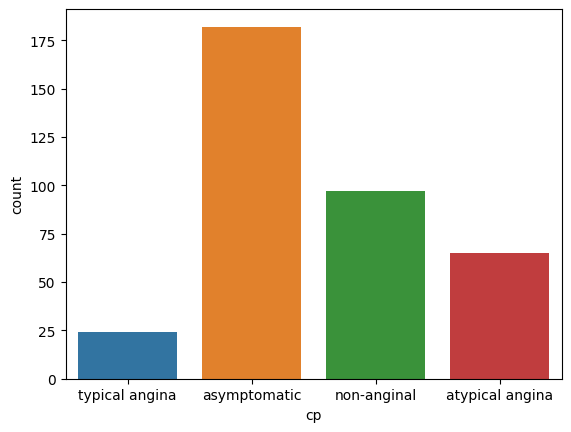

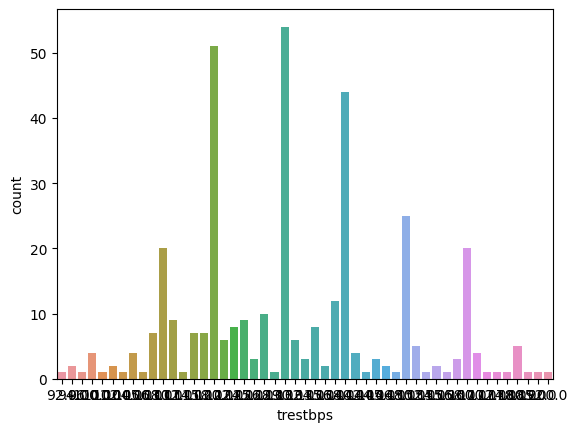

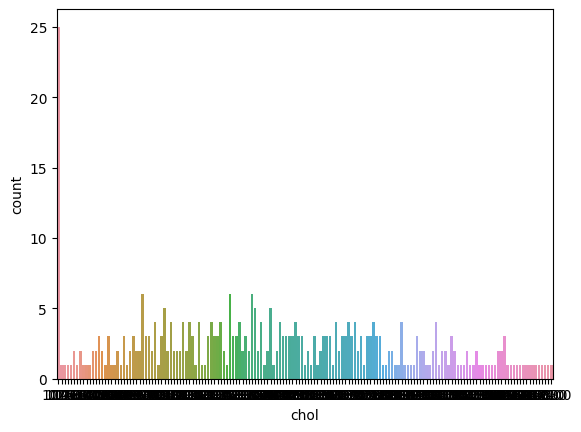

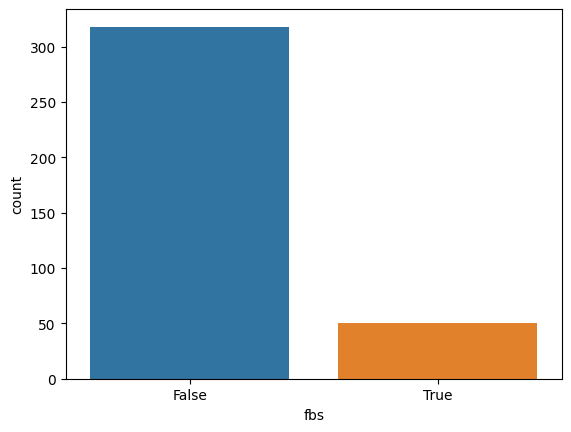

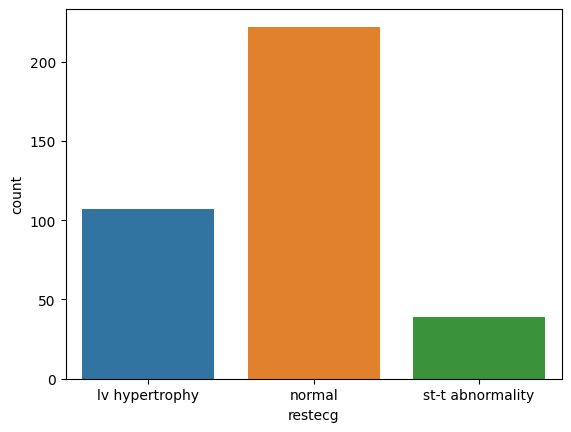

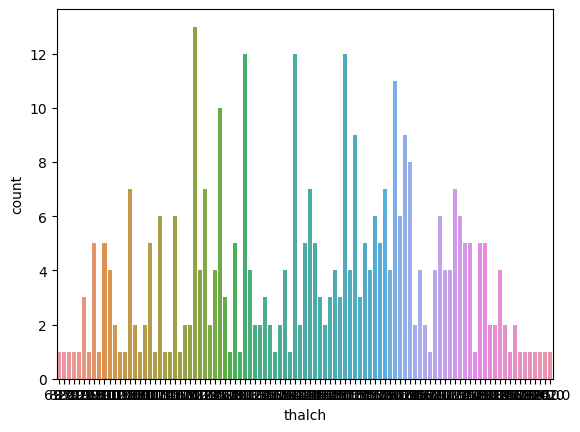

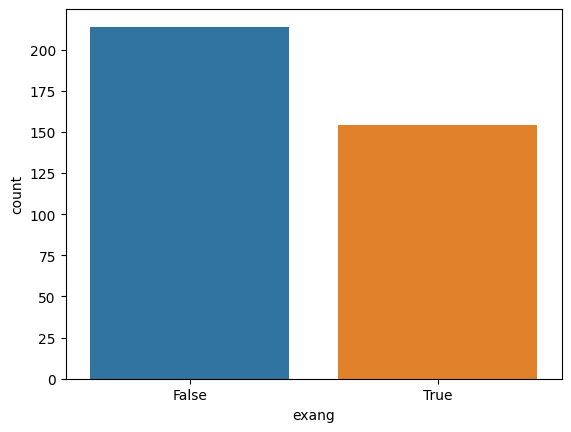

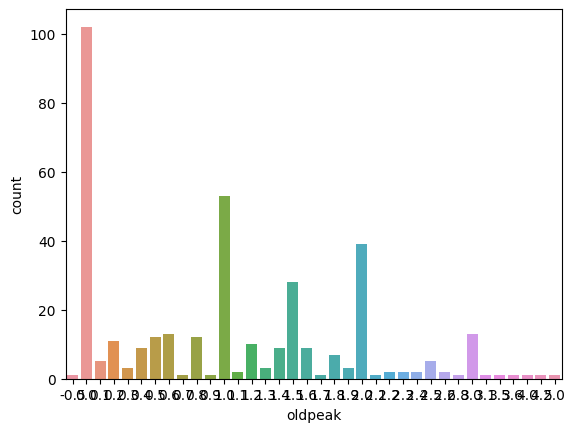

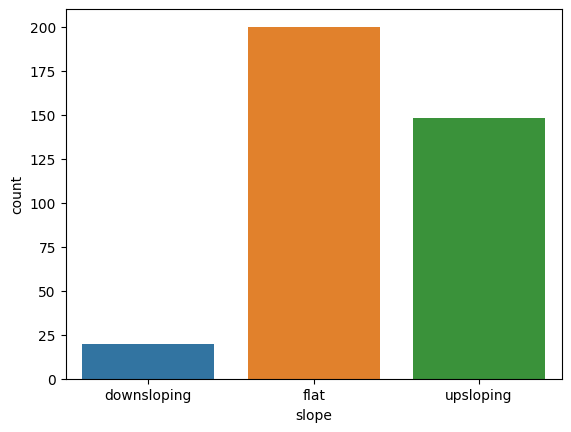

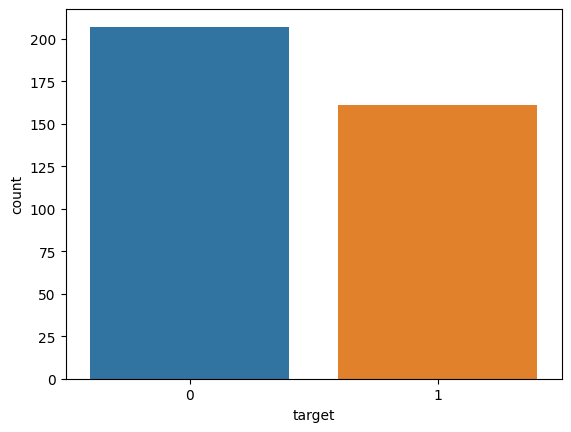

In [15]:
for i in data.columns: 
    sns.countplot(x = i, data = data)
    plt.show()

In [16]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to non-numerical columns
columns_to_encode = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'target']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [20]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target
0,32,1,3,31,62,1,0,57,0,24,0,0
1,36,1,0,15,58,0,0,36,1,27,1,1
2,6,1,2,22,78,0,1,92,0,31,0,0


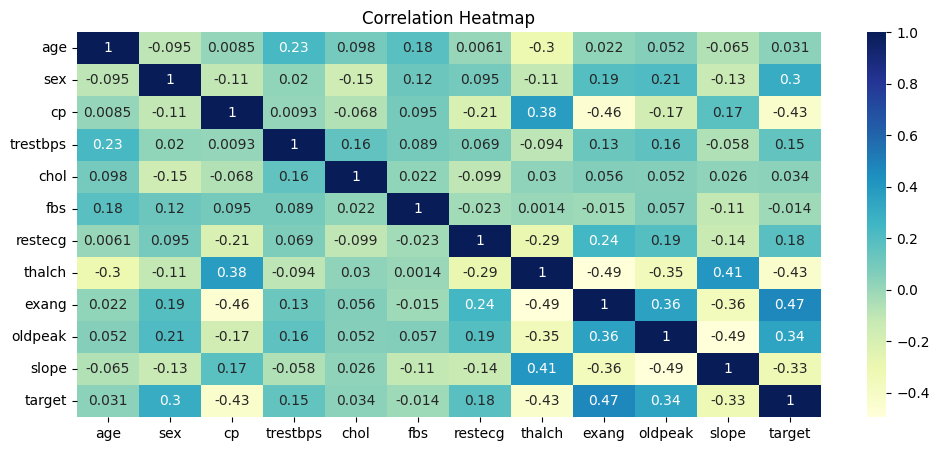

In [21]:
# Create a heat map
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
train = data.copy()
target = train.pop('target')
train.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
0,32,1,3,31,62,1,0,57,0,24,0
1,36,1,0,15,58,0,0,36,1,27,1


In [34]:
num_features_opt = 25   # the number of features that we need to choose as a result
num_features_max = 35   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

Feature Selection

In [ ]:
Uisng Pearson Correlation

In [23]:
# Threshold for removing correlated variables
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: pink'
    else:
        style = 'background-color: palegreen'
    return style

# Absolute value correlation matrix
corr_matrix = data.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.style.format("{:.2f}").applymap(highlight)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target
age,nan,0.09,0.01,0.23,0.10,0.18,0.01,0.30,0.02,0.05,0.06,0.03
sex,nan,nan,0.11,0.02,0.15,0.12,0.10,0.11,0.19,0.21,0.13,0.30
cp,nan,nan,nan,0.01,0.07,0.09,0.21,0.38,0.46,0.17,0.17,0.43
trestbps,nan,nan,nan,nan,0.16,0.09,0.07,0.09,0.13,0.16,0.06,0.15
chol,nan,nan,nan,nan,nan,0.02,0.10,0.03,0.06,0.05,0.03,0.03
fbs,nan,nan,nan,nan,nan,nan,0.02,0.00,0.01,0.06,0.11,0.01
restecg,nan,nan,nan,nan,nan,nan,nan,0.29,0.24,0.19,0.14,0.18
thalch,nan,nan,nan,nan,nan,nan,nan,nan,0.49,0.35,0.41,0.43
exang,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.36,0.36,0.47
oldpeak,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.49,0.34


In [26]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
features_filtered = data.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  12


Using SelectFromModel with LinearSCV

In [31]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

Using SelectFromModel with Lasso

In [32]:
lasso = LassoCV(cv=3).fit(train, target)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

Using SelectKBest with Chi-2

In [35]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(train, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

     Feature       Score
7     thalch  792.936170
9    oldpeak  306.281907
2         cp   76.253824
8      exang   47.941043
3   trestbps   38.144755
4       chol   11.399570
10     slope   10.035842
1        sex    9.942414
6    restecg    5.283386
0        age    1.237291
5        fbs    0.062222


Using Recursive Feature Elimination (RFE) with Logistic Regression

In [36]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(train, target)
rfe_support = rfe_selector.get_support()
rfe_feature = train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

11 selected features


In [37]:
features_best.append(rfe_feature)

Using Recursive Feature Elimination (RFE) with Random Forest

In [38]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(train, target)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200),
                threshold='1.25*median')

In [39]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

2 selected features


In [40]:
features_best.append(embeded_rf_feature)

Using Variance Threshold

In [42]:
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(data))
features_best.append(list(np.array(data.columns)[selector.get_support(indices=False)]))

In [43]:
#selecting the best features
features_best

[['thalch',
  'oldpeak',
  'cp',
  'exang',
  'trestbps',
  'chol',
  'slope',
  'sex',
  'restecg',
  'age',
  'fbs'],
 ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalch',
  'exang',
  'oldpeak',
  'slope'],
 ['cp', 'thalch'],
 ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

In [44]:
# The element is in at least one list of optimal features
main_cols_max = features_best[0]
for i in range(len(features_best)-1):
    main_cols_max = list(set(main_cols_max) | set(features_best[i+1]))
main_cols_max

['slope',
 'exang',
 'chol',
 'age',
 'fbs',
 'thalch',
 'sex',
 'oldpeak',
 'cp',
 'restecg',
 'trestbps']

In [45]:
len(main_cols_max)

11

In [46]:
# The element is in all lists of optimal features
main_cols_min = features_best[0]
for i in range(len(features_best)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(features_best[i+1])))
main_cols_min

['thalch']

In [47]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in data.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(num_features_opt)

,Num
thalch,4
age,3
cp,3
trestbps,3
chol,3
oldpeak,3
sex,2
fbs,2
restecg,2
exang,2


In [53]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
if not 'target' in main_cols:
    main_cols.append('target')
main_cols

['thalch',
 'age',
 'cp',
 'trestbps',
 'chol',
 'oldpeak',
 'sex',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'target']

Data Visualisation

In [58]:
from sklearn.model_selection import train_test_split

In [55]:
# Target
target_name = 'target'
target0 = data[target_name]
train0 = data[main_cols].drop([target_name], axis=1)

In [61]:
test_train_split_part = 0.2
cv_n_split = 3
random_state = 40

# For boosting model
train0b = train0.copy()

# Synthesis valid as "test" for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, target0, test_size=test_train_split_part, random_state=random_state)

In [62]:
# For models from Sklearn
scaler = MinMaxScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)
#scaler2 = StandardScaler()
scaler2 = RobustScaler()
train0 = pd.DataFrame(scaler2.fit_transform(train0), columns = train0.columns)

In [63]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, target0, test_size=test_train_split_part, random_state=random_state)

In [64]:
train.head(3)

,thalch,age,cp,trestbps,chol,oldpeak,sex,fbs,restecg,exang,slope
359,-1.039474,-1.333333,-0.5,-0.923077,0.704981,0.3125,0.0,0.0,0.0,1.0,-1.0
194,0.592105,-0.833333,0.5,-0.538462,-0.153257,-0.6250,0.0,0.0,0.0,0.0,1.0
198,-0.223684,1.000000,-0.5,1.384615,-0.122605,0.8125,0.0,0.0,-1.0,0.0,1.0


In [65]:
test.head(3)

,thalch,age,cp,trestbps,chol,oldpeak,sex,fbs,restecg,exang,slope
298,-0.592105,0.166667,-0.5,0.923077,-0.091954,0.3125,0.0,0.0,1.0,1.0,0.0
312,-0.934211,0.333333,0.0,1.769231,1.333333,0.0000,-1.0,0.0,0.0,1.0,0.0
294,-1.039474,0.000000,-0.5,0.461538,-0.306513,0.3125,0.0,0.0,0.0,0.0,0.0


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 298 to 274
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   thalch    74 non-null     float64
 1   age       74 non-null     float64
 2   cp        74 non-null     float64
 3   trestbps  74 non-null     float64
 4   chol      74 non-null     float64
 5   oldpeak   74 non-null     float64
 6   sex       74 non-null     float64
 7   fbs       74 non-null     float64
 8   restecg   74 non-null     float64
 9   exang     74 non-null     float64
 10  slope     74 non-null     float64
dtypes: float64(11)
memory usage: 6.9 KB


In [68]:
metrics_all = {1 : 'r2_score', 2: 'acc', 3 : 'rmse', 4 : 're'}
metrics_now = [1, 2, 3, 4] # you can only select some numbers of metrics from metrics_all

In [69]:
# list of accuracy of all model - amount of metrics_now * 2 (train & test datasets)
num_models = 20
acc_train = []
acc_test = []
acc_all = np.empty((len(metrics_now)*2, 0)).tolist()
acc_all

[[], [], [], [], [], [], [], []]

In [70]:
acc_all_pred = np.empty((len(metrics_now), 0)).tolist()
acc_all_pred

[[], [], [], []]

In [72]:
# Splitting train data for model tuning with cross-validation
from sklearn.model_selection import ShuffleSplit
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [73]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [83]:
def plot_cm(target, train_pred, target_test, test_pred):
    # Building the confusion matrices
    
    def cm_calc(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
        cm_sum = np.sum(cm, axis=1, keepdims=True)
        cm_perc = cm / cm_sum.astype(float) * 100
        annot = np.empty_like(cm).astype(str)
        nrows, ncols = cm.shape
        for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = cm_perc[i, j]
                if i == j:
                    s = cm_sum[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)
        cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
        cm.index.name = 'Actual'
        cm.columns.name = 'Predicted'
        return cm, annot

    
    # Building the confusion matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=True)
    
    # Training data
    ax = axes[0]
    ax.set_title("for training data")
    cm0, annot0 = cm_calc(target, train_pred)    
    sns.heatmap(cm0, cmap= "YlGnBu", annot=annot0, fmt='', ax=ax)
    
    # Test data
    ax = axes[1]
    ax.set_title("for test (validation) data")
    cm1, annot1 = cm_calc(target_test, test_pred)
    sns.heatmap(cm1, cmap= "YlGnBu", annot=annot1, fmt='', ax=ax)
    
    fig.suptitle('CONFUSION MATRICES')
    plt.show()

In [74]:
def acc_metrics_calc(num,model,train,test,target,target_test):
    # The models selection stage
    # Calculation of accuracy of model by different metrics
    global acc_all

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)
    if num != 17:
        print('target = ', target[:5].values)
        print('ytrain = ', ytrain[:5])
        print('target_test =', target_test[:5].values)
        print('ytest =', ytest[:5])

    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
            acc_test = round(r2_score(target_test, ytest) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
            acc_test = round(metrics.accuracy_score(target_test, ytest) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
            acc_test = round(acc_rmse(target_test, ytest) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)
            acc_test = round(acc_d(target_test, ytest) * 100, 2)
        
        print('acc of', metrics_all[x], 'for train =', acc_train)
        print('acc of', metrics_all[x], 'for test =', acc_test)
        acc_all[num_acc].append(acc_train) #train
        acc_all[num_acc+1].append(acc_test) #test
        num_acc += 2
    
    #  Building the confusion matrices
    plot_cm(target, ytrain, target_test, ytest)

In [75]:
def acc_metrics_calc_pred(num,model,name_model,train,test,target):
    # The prediction stage
    # Calculation of accuracy of model for all different metrics and creates of the main submission file for the best model (num=0)
    global acc_all_pred

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)

    print('**********')
    print(name_model)
    if num != 17:
        print('target = ', target[:15].values)
        print('ytrain = ', ytrain[:15])
        print('ytest =', ytest[:15])
    
    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)

        print('acc of', metrics_all[x], 'for train =', acc_train)
        acc_all_pred[num_acc].append(acc_train) #train
        num_acc += 1
    
    # Save the submission file
    submission[target_name] = ytest
    submission.to_csv('submission_' + name_model + '.csv', index=False)    

Tuning and testing features

In [86]:
# Thanks to https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, cv=None, axes=None, ylim=None, 
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), random_state=0):
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator=estimator, X=X, y=y, cv=cv,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    plt.show()
    return

Support Vector Machines

{'kernel': 'sigmoid', 'tol': 0.001}
target =  [1 0 0 0 1]
ytrain =  [1 0 1 0 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 2.78
acc of r2_score for test = 2.42
acc of acc for train = 76.19
acc of acc for test = 75.68
acc of rmse for train = 48.8
acc of rmse for test = 49.32
acc of re for train = 55.56
acc of re for test = 51.43


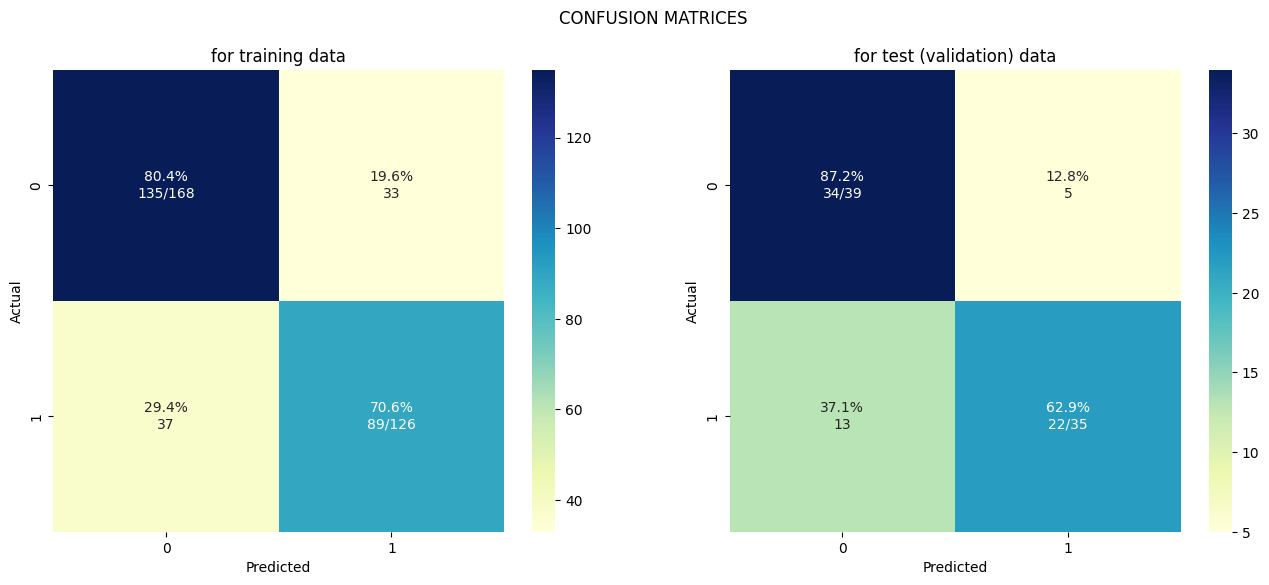

In [84]:
# Support Vector Machines
from sklearn.model_selection import GridSearchCV
svr = SVC()
svr_CV = GridSearchCV(svr, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                       'tol': [1e-3]}, 
                      cv=cv_train, verbose=False)
svr_CV.fit(train, target)
print(svr_CV.best_params_)
acc_metrics_calc(1,svr_CV,train,test,target,target_test)

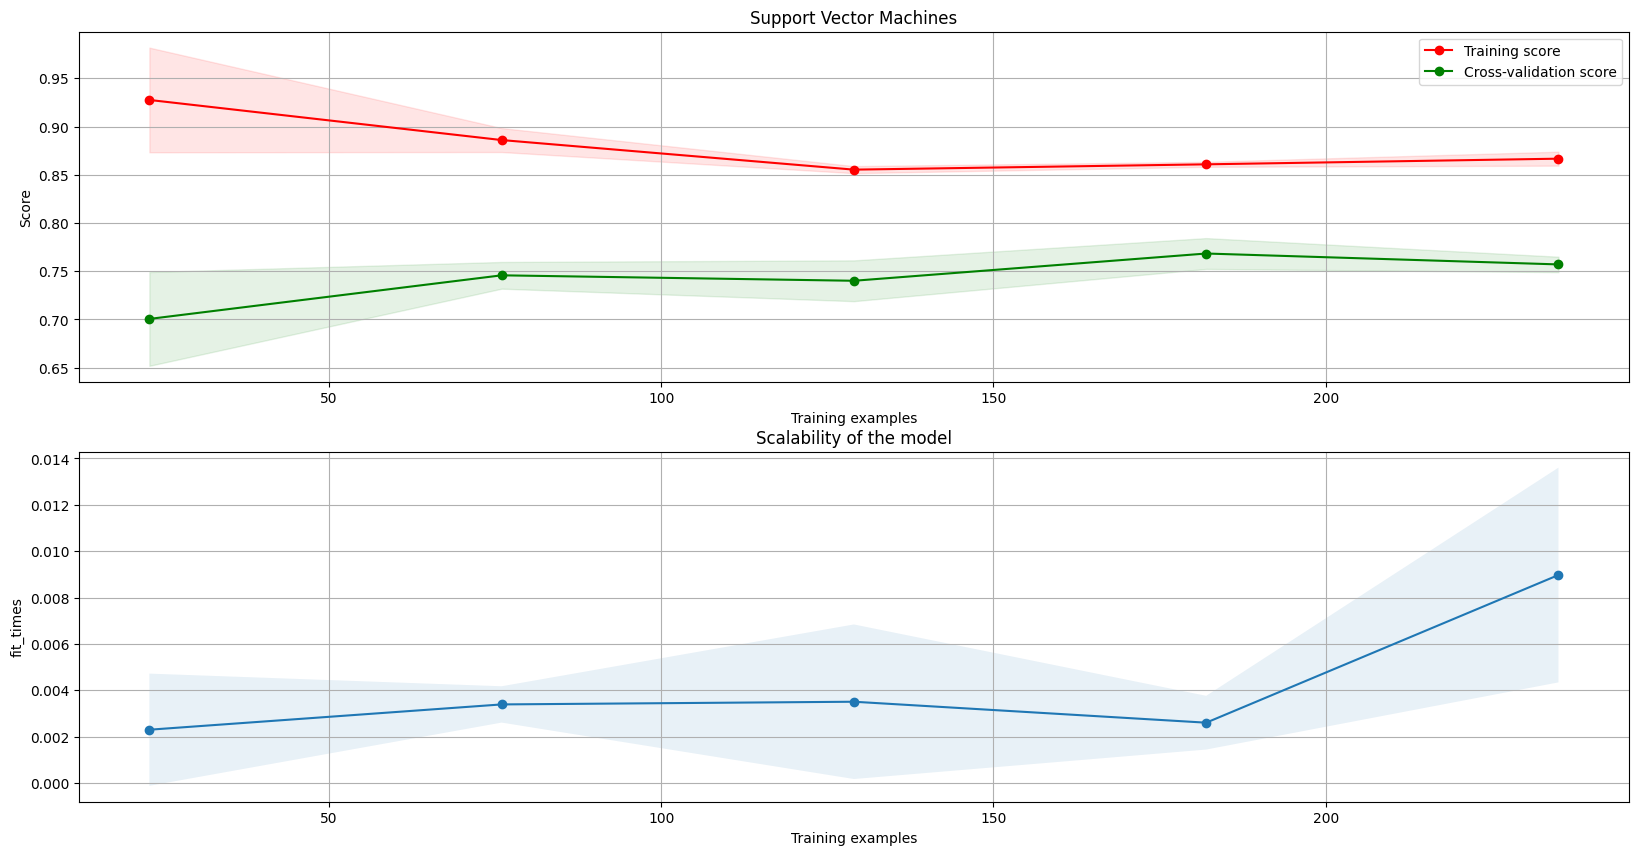

In [89]:
# Building learning curve of model
plot_learning_curve(svr, "Support Vector Machines", train, target, cv=cv_train)

MLP classifier

{'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
target =  [1 0 0 0 1]
ytrain =  [1 0 1 0 1]
target_test = [1 1 1 0 1]
ytest = [1 0 1 0 1]
acc of r2_score for train = 16.67
acc of r2_score for test = 18.68
acc of acc for train = 79.59
acc of acc for test = 79.73
acc of rmse for train = 45.18
acc of rmse for test = 45.02
acc of re for train = 47.62
acc of re for test = 42.86


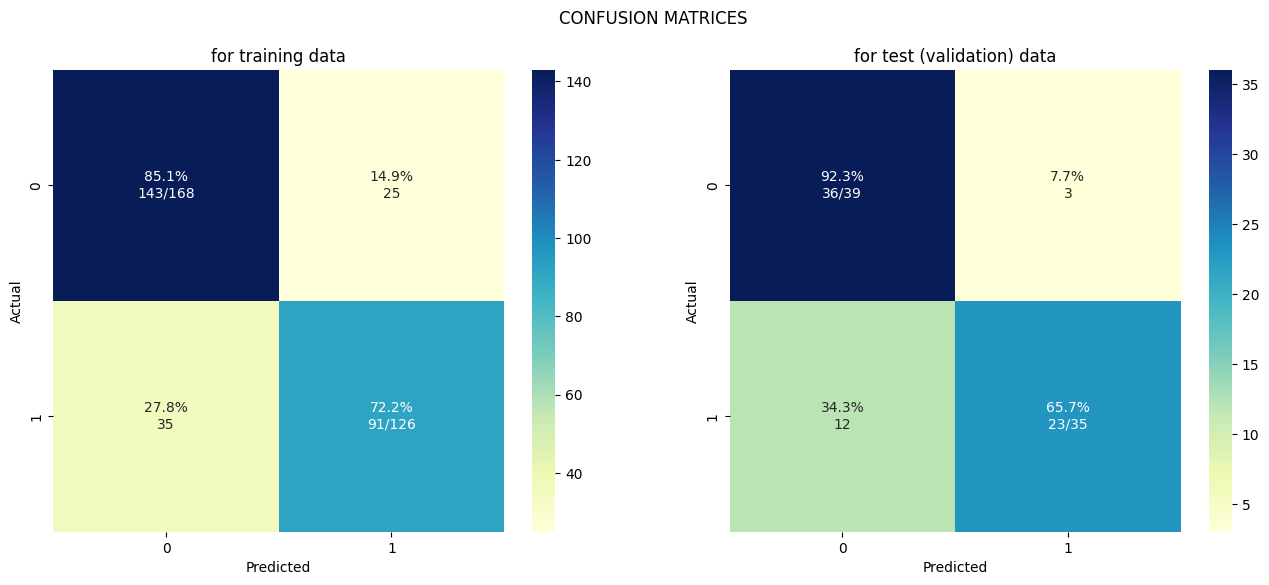

CPU times: total: 4 s
Wall time: 5.53 s


In [90]:
%%time
# MLPClassifier

mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [i for i in range(2,5)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [1000]
              }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False)
mlp_GS.fit(train, target)
print(mlp_GS.best_params_)
acc_metrics_calc(3,mlp_GS,train,test,target,target_test)

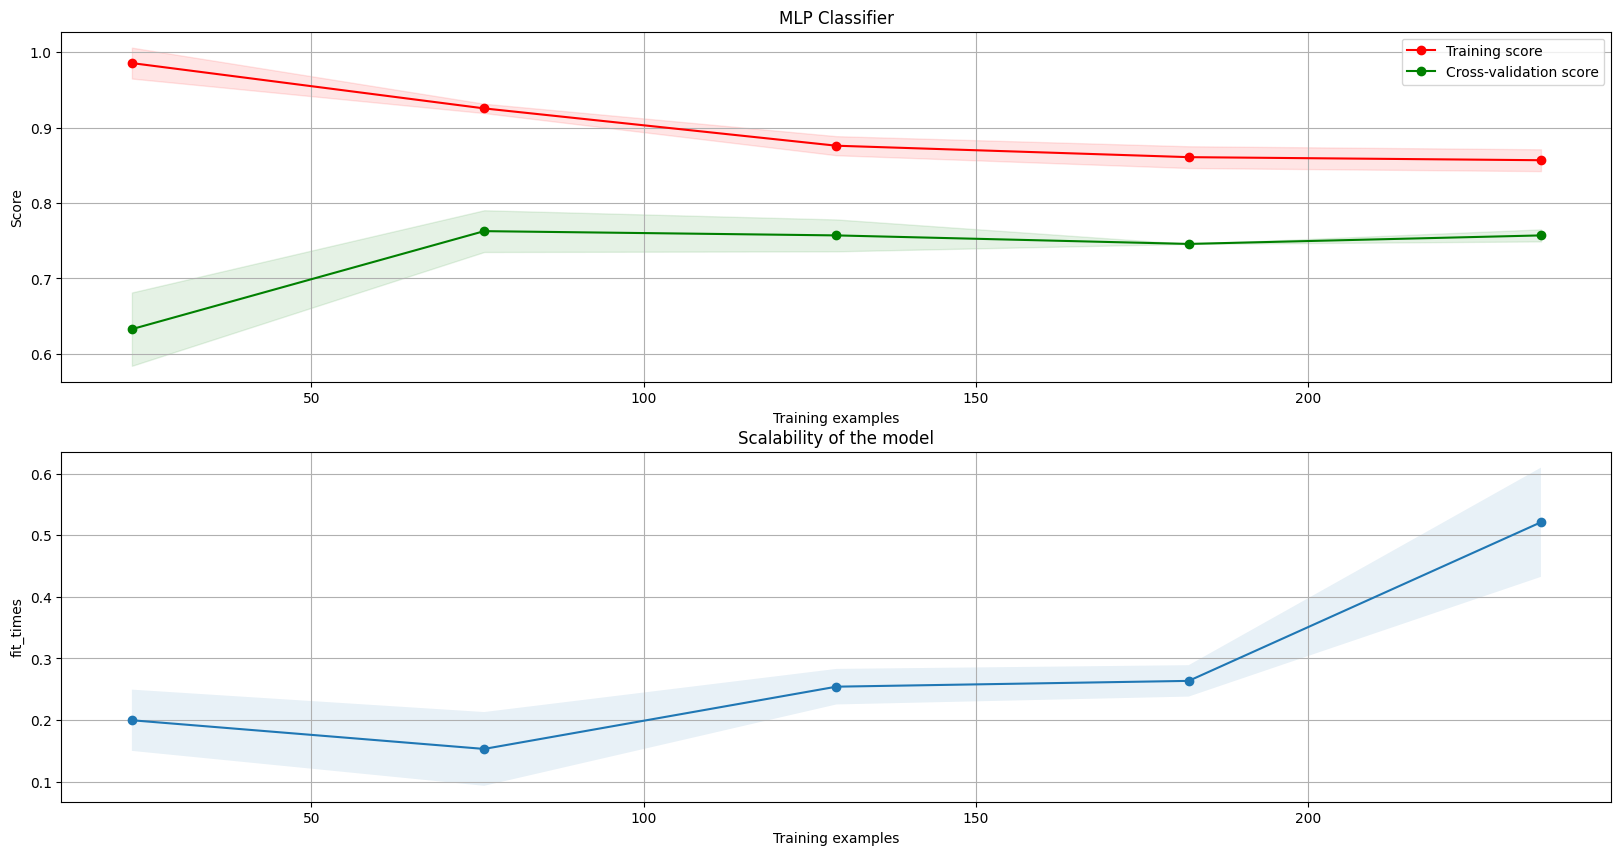

In [91]:
# Building learning curve of model
plot_learning_curve(mlp, "MLP Classifier", train, target, cv=cv_train)

Stochastic gradient descent

{'alpha': 0.035}
target =  [1 0 0 0 1]
ytrain =  [1 0 1 0 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 16.67
acc of r2_score for test = 7.84
acc of acc for train = 79.59
acc of acc for test = 77.03
acc of rmse for train = 45.18
acc of rmse for test = 47.93
acc of re for train = 47.62
acc of re for test = 48.57


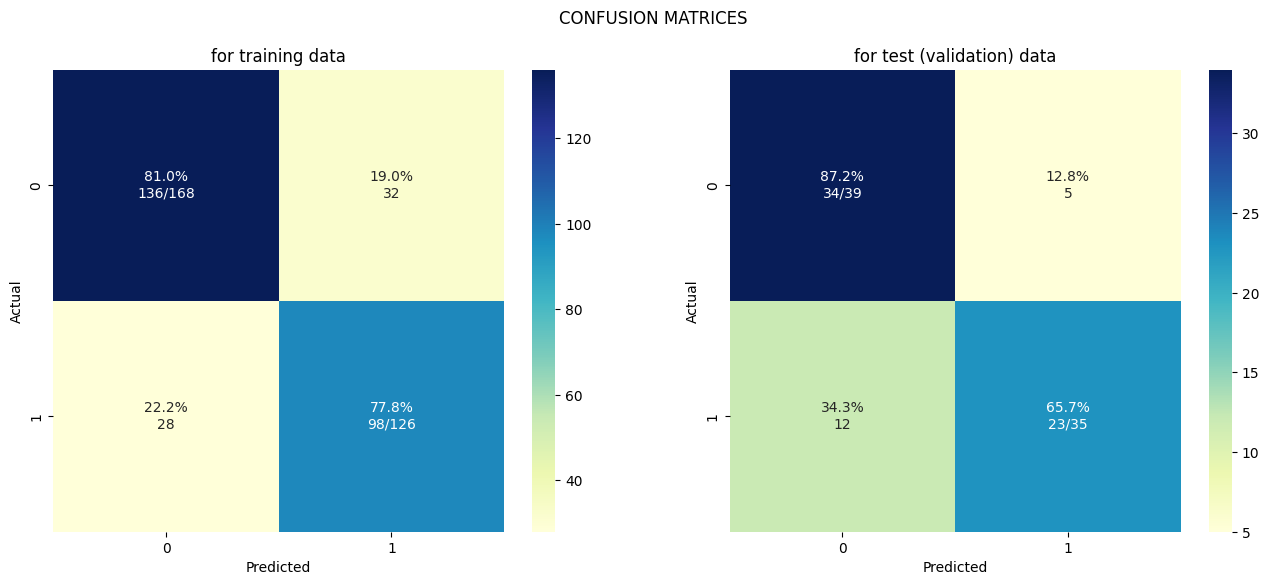

In [92]:
# Stochastic Gradient Descent

sgd = SGDClassifier(early_stopping=True)
param_grid = {'alpha': [0.035, 0.04, 0.45]}
sgd_CV = GridSearchCV(sgd, param_grid=param_grid, cv=cv_train, verbose=False)
sgd_CV.fit(train, target)
print(sgd_CV.best_params_)
acc_metrics_calc(4,sgd_CV,train,test,target,target_test)

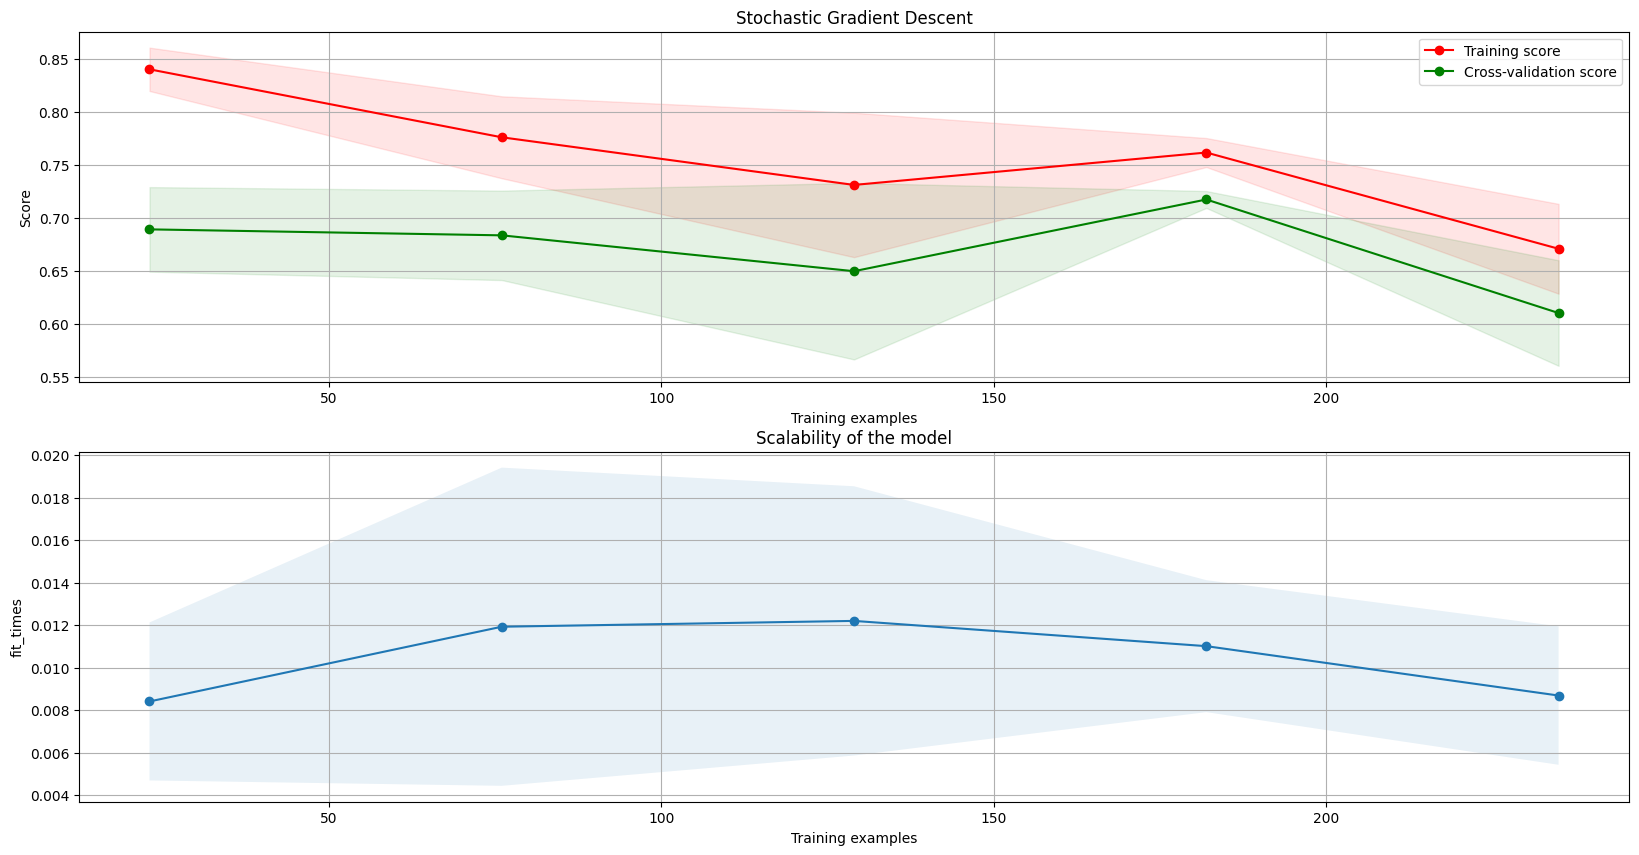

In [93]:
# Building learning curve of model
plot_learning_curve(sgd, "Stochastic Gradient Descent", train, target, cv=cv_train)